# 主成分分析法(PCA)

## 原理

### 定义
- PCA(Principal Component Analysis)，即主成分分析方法，
- 是一种使用最广泛的数据降维算法。  
- PCA的主要思想是将n维特征映射到k维上,k<n.
- 这k维是全新的正交特征也被称为主成分
- 是在原有n维特征的基础上重新构造出来的k维特征。 
- 使多维的数据映射到一条轴上(向量乘法)   
- 使映射的点尽可能分散(梯度上升)
 

### 降维的好处
  - 使得数据集更易使用。
  - 降低算法的计算开销。
  - 去除噪声。
  - 使得结果容易理解。  
  - 降到二维后，可以可视化关系
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200422213320.jpg)

### 步骤

1. **均值归零**

- demean
- 原函数  
$$\operatorname{Var}\left(X_{\text {project}}\right)=\frac{1}{m} \sum_{i=1}^{m}\left\|X_{\text {projet}}^{(i)}-\bar{X}_{\text {project}}\right\|^{2}$$
- 均值归零(可以简化方差算法)
$$\operatorname{Var}\left(X_{\text {propect}}\right)=\frac{1}{m} \sum_{i=1}^{m}\left\|X_{\text {poject}}^{(i)}\right\|^{2}$$

```
def demean(X):
    # axis=0即按列计算均值，及每个属性的均值，1则是计算行的均值
    return (X - np.mean(X, axis=0))
```

2. **求出w轴的的向量**

- 将x映射到w向量的方差
$$\text { 使得 } \operatorname{Var}\left(X_{\text {projac}}\right)=\frac{1}{m} \sum_{r=1}^{m}\left(X^{(i)} \cdot w\right)^{2} \quad \text { 最大 }$$
- 也就是每个点到这条线的映射相距够远
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200422214207.png)
  - w是单位向量, $X^{(i)}$已知向量, $X^{(project)}$是在w上的映射
  - w是单位向量
$$X^{(i)} \cdot w=\left\|X_{p \text { project }}^{(i)}\right\|$$
- 求导(斜率或者叫梯度)
$$
\nabla f=\frac{2}{m}\left(\begin{array}{c}
\sum_{i=1}^{m}\left(X^{(i)} w\right) X_{1}^{(i)} \\
\sum_{i=1}^{m}\left(X^{(i)} w\right) X_{2}^{(i)} \\
\cdots \\
\sum_{i=1}^{m}\left(X^{(i)} w\right) X_{n}^{(n)}
\end{array}\right)=\frac{2}{m} \cdot X^{T}(X w)
$$
  - w为单位向量
- 梯度上升求最大值
$$ w=w+e t a * gradient$$

3. **求第n的主成分**

- 求出去掉上一个主成分向量的方向的数据 
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200422215256.jpg)
$$X^{'(i)}=X^{(i)}-X_{\text {project}}^{(i)} $$
- 利用这个数据再求轴  
$$\text { 使得 } \operatorname{Var}\left(X_{\text {projac}}\right)=\frac{1}{m} \sum_{r=1}^{m}\left(X^{(i)} \cdot w\right)^{2} \quad \text { 最大 }$$

## 自我实现

### 二维数据的PCA

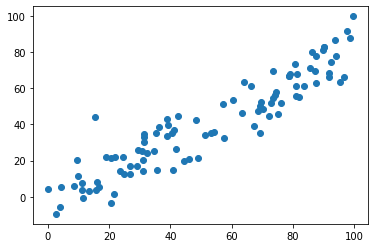

In [1]:
# 生成数据
import numpy as np
import matplotlib.pyplot as plt
X = np.empty((100, 2))
# 随机生成变量
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10, size=100)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

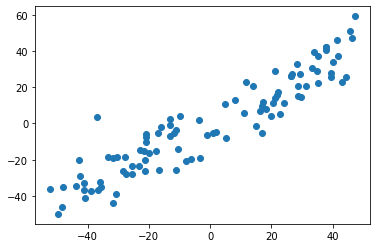

In [2]:
'''均值归零'''
def demean(X):
    # axis=0即按列计算均值，及每个属性的均值，1则是计算行的均值
    return (X - np.mean(X, axis=0))

X_demean = demean(X)
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.show()

In [3]:
'''方差函数'''
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

'''方差函数导数'''
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

'''将向量化简为单位向量'''
def direction(w):
    return w / np.linalg.norm(w)

'''梯度上升法'''
def gradient_ascent(w, X, eta, n_iter=1e4, epsilon=0.0001):
    '''
    梯度上升法
    :param w:
    :param X:
    :param eta:
    :param n_iter:
    :param epsilon:
    :return:
    '''
    #先化简w为单位向量，方便运算
    w = direction(w)
    i_iter = 0
    while i_iter < n_iter:
        gradient = df_math(w, X)
        last_w = w
        w += gradient * eta
        #每次更新后将w化简为单位向量
        w = direction(w)
        if abs(f(w, X) - f(last_w, X)) < epsilon:
            break
        i_iter += 1
    return w

[0.76313597 0.64623795]


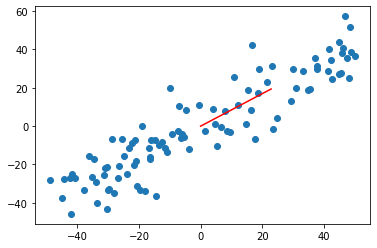

In [0]:
w_init = np.random.random(X_demean.shape[1])
eta = 0.01
w = gradient_ascent(w_init, X_demean, eta)
print(w)
plt.scatter(X_demean[:, 0], X_demean[:, 1])
# 以0点为基准, 横坐标w[0], 纵坐标w[1]
plt.plot([0, w[0] * 30], [0, w[1] * 30], color='r')
plt.show()

### 多维数据的PCA

In [0]:
import numpy as np
import matplotlib.pyplot as plt

class PCA:

    def __init__(self, n_component):
        assert n_component >= 1, 'n_component is invalidate'
        self.n_component = n_component
        self.components_ = None

    def __repr__(self):
        return 'PCA(n_component=%d)' % self.n_component

    def fit(self,X, eta, n_iter=1e4, epsilon=0.0001):
        '''
        主成分分析
        :param X: 
        :param eta: 
        :param n_iter: 
        :param epsilon: 
        :return: 
        '''
        assert X.shape[1] >= self.n_component, 'X is invalidate'

        '''均值归零'''
        def demean(X):
            return X - np.mean(X, axis=0)

        '''方差函数'''
        def f(w, X):
            return np.sum(X.dot(w)**2) / len(X)

        '''方差函数导数'''
        def df_ascent(w, X):
            return X.T.dot(X.dot(w)) * 2 / len(X)

        '''将向量化简为单位向量'''
        def direction(w):
            return w / np.linalg.norm(w)

        '''寻找第一主成分'''
        def first_component(w, X, eta, n_iter=1e4, epsilon=0.0001):
            i_iter = 0
            while i_iter < n_iter:
                last_w = w
                gradient = df_ascent(w, X)
                w += eta * gradient
                w = direction(w)
                if abs(f(w, X) - f(last_w, X)) < epsilon:
                    break
                i_iter += 1
            return w

        self.components_ = np.empty(shape=(self.n_component, X.shape[1]))
        X = demean(X)
        for i in range(self.n_component):
            w = np.random.random(X.shape[1])
            w = first_component(w, X, eta, n_iter, epsilon)
            X = X - (X.dot(w)).reshape(-1, 1) * w
            self.components_[i, :] = w
        return self

    def transform(self, X):
        '''
        将X映射到各个主成分中
        :param X:
        :return:
        '''
        assert X.shape[1] == self.components_.shape[1]
        return X.dot(self.components_.T)

    def inverse_transform(self, X):
        '''
        将低维数据转回高维
        :param X:
        :return:
        '''
        assert X.shape[1] == self.components_.shape[0]
        return X.dot(self.components_)

[[0.78747374 0.61634821]]
(100, 1)


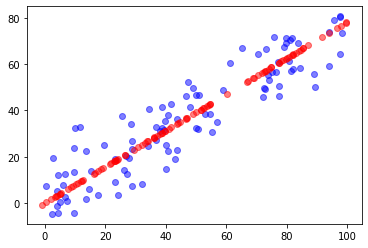

In [0]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10, size=100)
eta = 0.01

pca = PCA(1)
pca.fit(X, eta)
X_new = pca.transform(X)
print(pca.components_)
print(X_new.shape)
X_inverse = pca.inverse_transform(X_new)
plt.scatter(X[:, 0], X[:, 1], color='b', alpha=0.5)
plt.scatter(X_inverse[:, 0], X_inverse[:, 1], color='r', alpha=0.5)
plt.show()

## sklearn实现

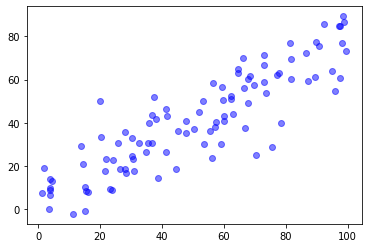

In [4]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dataset
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import time

'''模拟数据集'''
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10, size=100)
plt.scatter(X[:, 0], X[:, 1], color='b', alpha=0.5)
plt.show()

In [5]:
# 可以直接指认要降到几维
pca = PCA(n_components=1)
pca.fit(X)
print(pca.components_)
# 把转化好的数据传回来
X_new = pca.transform(X)
print(X_new.shape)

[[0.78559504 0.618741  ]]
(100, 1)


In [6]:
# 可以查看唯一维度, 还保留多少信息
pca = PCA(n_components=X.shape[1])
pca.fit(X)
pca.explained_variance_ratio_ 

array([0.9424486, 0.0575514])

In [0]:
# 可以按照比例保留信息
pca = PCA(0.95)
pca.fit(X)
print(pca.components_)
X_new = pca.transform(X)
print(X_new.shape)

[[-0.78587802 -0.61838155]
 [-0.61838155  0.78587802]]
(100, 2)


pca.components_: [[0.78559504 0.618741  ]]
X_new: (100, 1)
X_new.shape前五个: [[ 33.03867392]
 [ 12.80150406]
 [-54.11212748]
 [ 16.17355582]
 [ -6.73875607]]


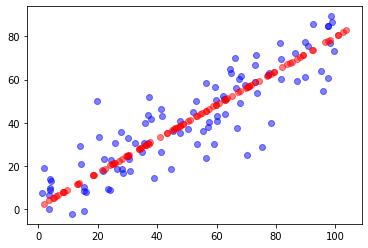

In [11]:
#fit PCA 算法
#降成一维
pca = PCA(n_components=1)
pca.fit(X)
print("pca.components_: "+str(pca.components_))
#降维以后的数据传给X_new
X_new = pca.transform(X)
print("X_new: "+str(X_new.shape))
print("X_new.shape前五个: "+str(X_new[0:5]))
# 可视化需求, 再转成2维
X_inverse = pca.inverse_transform(X_new)
plt.scatter(X[:, 0], X[:, 1], color='b', alpha=0.5)
plt.scatter(X_inverse[:, 0], X_inverse[:, 1], color='r', alpha=0.5)
plt.show()

## PAC例子

### KNN进行PCA

In [22]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dataset
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import time

'''真实数据'''
data = dataset.load_digits()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
# 不进行PCA
knn_clf = KNeighborsClassifier()
start = time.time()
knn_clf.fit(X_train, y_train)
end = time.time()
print("without PCA the KNN classifier's time cost is %s" % (end - start))
print("without PCA the KNN classifier's test score is %s" % knn_clf.score(X_test, y_test))

without PCA the KNN classifier's time cost is 0.0024509429931640625
without PCA the KNN classifier's test score is 0.9866666666666667


In [23]:
# 使用PCA
# 相当于n_component=2时，
# 只解释了27%左右的数据
knn_clf = KNeighborsClassifier()
pca = PCA(n_components=2)
pca.fit(X_train)
pca.explained_variance_ratio_ 

array([0.14566817, 0.13735469])

In [24]:
X_train_new = pca.transform(X_train)
X_test_new = pca.transform(X_test)
start = time.time()
knn_clf.fit(X_train_new, y_train)
end = time.time()
print("with PCA the KNN classifier's time cost is %s" % (end - start))
print("with PCA the KNN classifier's test score is %s" % knn_clf.score(X_test_new, y_test))

with PCA the KNN classifier's time cost is 0.0016751289367675781
with PCA the KNN classifier's test score is 0.6066666666666667


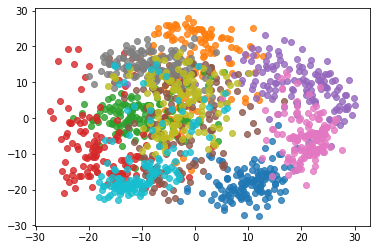

In [25]:
# 可视化降到2维的数据
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_new = pca.transform(X_train)
for i in range(10):
    # 一共有10种分类，for循环运行10次，每次针对一种分类进行scatter
    plt.scatter(X_train_new[y_train == i, 0], X_train_new[y_train == i, 1], alpha=0.8)
plt.show()

In [18]:
# 所有的解释率
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_

array([1.45668166e-01, 1.37354688e-01, 1.17777287e-01, 8.49968861e-02,
       5.86018996e-02, 5.11542945e-02, 4.26605279e-02, 3.60119663e-02,
       3.41105814e-02, 3.05407804e-02, 2.42337671e-02, 2.28700570e-02,
       1.80304649e-02, 1.79346003e-02, 1.45798298e-02, 1.42044841e-02,
       1.29961033e-02, 1.26617002e-02, 1.01728635e-02, 9.09314698e-03,
       8.85220461e-03, 7.73828332e-03, 7.60516219e-03, 7.11864860e-03,
       6.85977267e-03, 5.76411920e-03, 5.71688020e-03, 5.08255707e-03,
       4.89020776e-03, 4.34888085e-03, 3.72917505e-03, 3.57755036e-03,
       3.26989470e-03, 3.14917937e-03, 3.09269839e-03, 2.87619649e-03,
       2.50362666e-03, 2.25417403e-03, 2.20030857e-03, 1.98028746e-03,
       1.88195578e-03, 1.52769283e-03, 1.42823692e-03, 1.38003340e-03,
       1.17572392e-03, 1.07377463e-03, 9.55152460e-04, 9.00017642e-04,
       5.79162563e-04, 3.82793717e-04, 2.38328586e-04, 8.40132221e-05,
       5.60545588e-05, 5.48538930e-05, 1.08077650e-05, 4.01354717e-06,
      

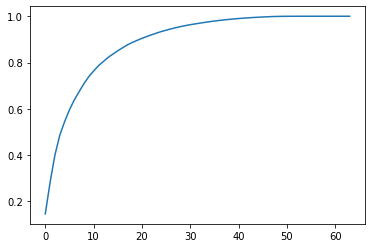

In [19]:
# 可视化解释率
plt.plot([i for i in range(X_train.shape[1])],[np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])])

In [20]:
# 指定保留百分之多少信息
pca = PCA(0.95)
pca.fit(X_train)
pca.n_components_

28

In [21]:
x_test_1 = pca.transform(X_test)
x_train_1 = pca.transform(X_train)
knn_1 = KNeighborsClassifier()
knn_1.fit(x_train_1,y_train)
knn_1.score(x_test_1,y_test)

0.98

### 数据的降噪

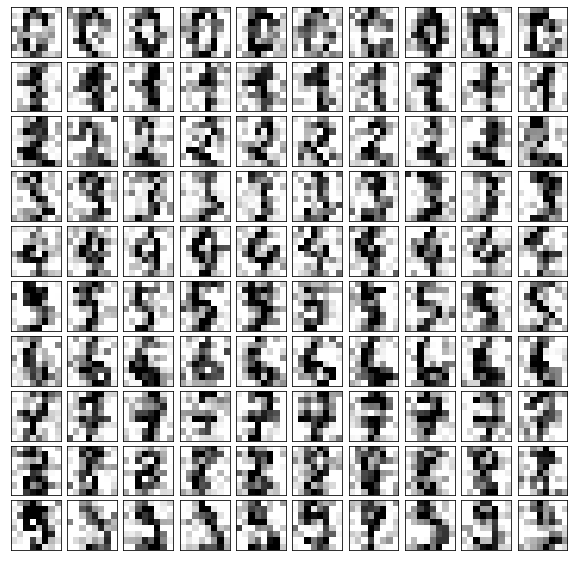

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dataset
from sklearn.decomposition import PCA

'''加载数据'''
data = dataset.load_digits()
X = data.data
y = data.target
#有噪声的数据, 原来的数据加上均值为0，方差为4的噪音
noisy_digits = X + np.random.normal(0, 4, size=X.shape)

# 0的手写数据取10个
example_digits = noisy_digits[y == 0, :][:10]

#取100个样例数据
for i in range(1, 10):
    X_num = noisy_digits[y == i, :][:10]
    example_digits = np.vstack([example_digits, X_num])

'''绘图函数'''
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))

'''绘制带有噪声的数据'''
plot_digits(example_digits)
plt.show()

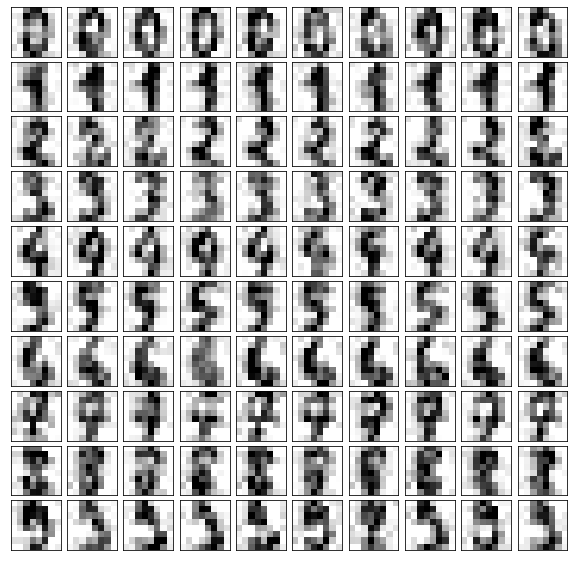

In [27]:
'''PCA数据降噪'''
#这里选用n_component=0.5进行主成分分析
pca = PCA(0.5)
pca.fit(example_digits)
#映射到低维数据example_digits_new
example_digits_new = pca.transform(example_digits)
#再从低维数据映射回高维数据并绘制
example_digits_no_noise = pca.inverse_transform(example_digits_new)
plot_digits(example_digits_no_noise)
plt.show()

### 人脸识别与特征脸

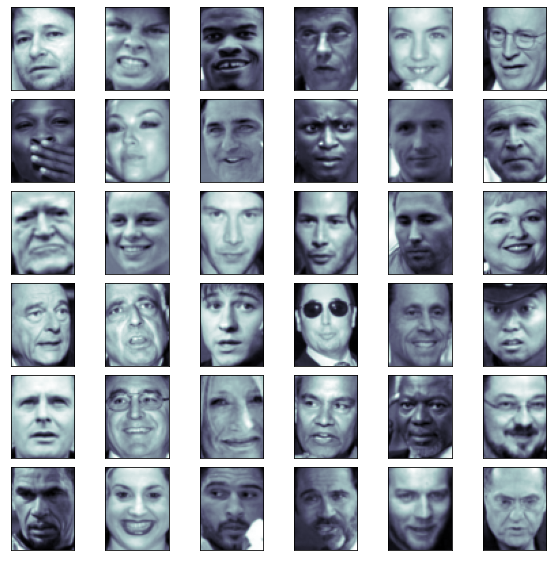

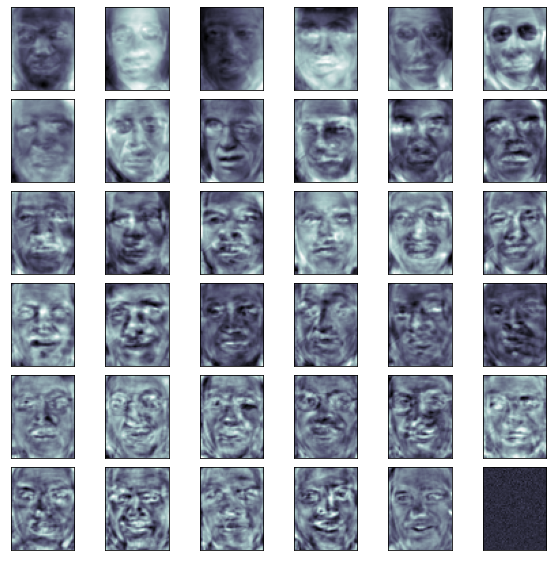

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA

'''加载数据'''
face = fetch_lfw_people()

#face数据集的特征集是13233 * 2914的矩阵，打乱顺序，取其中36个进行测试
random_index = np.random.permutation(len(face.data))
X = face.data[random_index]
example_face = X[:36, :]

#绘制原始的人脸
'''绘图函数'''
def plot_faces(data):
    fig, axes = plt.subplots(6, 6, figsize=(10, 10),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(62, 47), cmap='bone')

plot_faces(example_face)
plt.show()

#数据集大，使用随机的方式求解pca，提升效率
pca = PCA(svd_solver='randomized')
pca.fit(example_face)
agent_faces = pca.components_[:36, :]
plot_faces(agent_faces)
plt.show()